##Librerias que necesitamos instalar

Intalamos la libreria Rem Bg para poder remover el fondo de las imagenes que vamos a procesar

In [ ]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.1 MB/s eta 0:00:00


#Preprocesamiento de los datos

Importamos las demás librerias que vamos a utilizar

In [ ]:
# TensorFlow es la biblioteca de software de codigo abierto que vamos autilizar ejecutar el entrenamiento del modelo de aprendizaje automatico
import tensorflow as tf
# Vamos a utilizar numpy para crear y modificar las matrices donde vamos alojar las imagenes tanto de prueba y entrenamiento como
import numpy as np
# Con PIL vamos a editar las imagenes desde python
from PIL import Image
# Utilizamos pathlib para consultar correctamente la ruta de un archivo
import pathlib
# Con matplotlib y pyplot vamos a editar los graficos
import matplotlib.pyplot as plt
# Usamos ramdom para generar valores aleatorios y escoger al azar imagenes de nuestro dataset
import random

In [ ]:
# Se consulto una dataset del repositorio de Codigo Maquina para obtener los datos de entrenamiento y prueba
# Se guardo el URL del repositorio en la variable url para consultarla facilmente
url = 'https://github.com/CodigoMaquina/code/raw/main/datos/piedra_papel_tijera.zip'

In [ ]:
# Con la funcion tf.keras.utils.get_file de tensorflow descargamos el archivo de piedra_papel_tijera.zip y lo extraemos automaticamente
archivo = tf.keras.utils.get_file(origin=url,archive_format='zip', extract=True)

1100593/1100593 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Utilizamos pathlib.Path para tomar la ruta alojada en archivo y lo combertimos a string y le quitamos la extencion .zip mediante la fubncion replace
# Esto lo hacemos para guardar correctmante la ruta del archivo ya que ya que archivo quedo guardado con .zip
ruta=str(pathlib.Path(archivo))
ruta=ruta+'/piedra_papel_tijera'
print(ruta)

/root/.keras/datasets/piedra_papel_tijera.zip/piedra_papel_tijera


In [ ]:
# Creamos descripcion una tupla para guardar y que no se pueda remplazar las etiquetas de piegra, papel y tijera
# Le asignamos una clase a cada etiqueta para facilitar la manipulacion de las etiquetas
descripcion=('papel', 'piedra', 'tijera')
clases={'papel':0,'piedra':1,'tijera':2}

# Creamos numero_de_imagenes para asignar el numero de imagenes que tenemos en cada clase o carpeta
numero_de_imagenes=700

# Definimos el numero de imagenes de entrenamiento y prueba, dejando el 80% de las imagenes para entrenamiento segun bibliografia, el restante 20% par prueba
numero_de_imagenes_de_entrenamiento=round(numero_de_imagenes*0.8)
numero_de_imagenes_de_prueba=round(numero_de_imagenes*0.20)

In [ ]:
# Se define un array vacio con np.empty donde la cantidad de espacios es numero_de_imagenes_de_entrenamiento*len(clases) que es la cantidad total de imagenes
# de las tres clases para entrenamiento, además se aclara que las dimensiones de las imagenes van a ser de 20*30 y que el tipo de dado que van alojar es 'uint8'
# del rango de 0 a 255 que es la escala de grises
array_de_imagenes_de_entrenamiento=np.empty((numero_de_imagenes_de_entrenamiento*len(clases),20,30),dtype='uint8')
# Se define un array para alojar las clases de cada una de las imagenes que son los numeros 0, 1 y 2
array_de_clases_de_entrenamiento=np.empty(numero_de_imagenes_de_entrenamiento*len(clases), dtype='uint8')

In [ ]:
array_de_imagenes_de_prueba=np.empty((numero_de_imagenes_de_prueba*len(clases),20,30),dtype='uint8')
array_de_clases_de_prueba=np.empty(numero_de_imagenes_de_prueba*len(clases), dtype='uint8')

In [ ]:
# Empezamos a llenar los array de imagenes de entrenameinto y de clases de cada imagen de entrenamiento
for i in range(numero_de_imagenes_de_entrenamiento): # La idea es que i va a ir de 0 a 559 para recoger cada una de las imagenes de cada una de las clases
  for clase in clases: # Creamos a clase que va a tomar los valores de 'piedra', 'papel' o 'tijeras' de clases
    imagen=Image.open(ruta+'/'+clase+'/'+str(i)+'.png') # Abrimos y guardamos cada imagen sigueindo la ruta en la que estan guardadas, con ruta más la clase
    # que se refiriria a la carpeta donde esta la imagen, más el nombre de la imagen que va de 0 a 699 en la carpeta, pero nosotros para las imagenes de
    # prueba solo tomamos de 0 a 599
    indice_de_imagen=i+clases[clase]*numero_de_imagenes_de_entrenamiento # Asignamos una variable indice_de_imagen, que nos va ayudar a ubicar la imagen y
    # la clase de esa imagen en una posicion ordenada en el array. La idea es que en los primeros 560 espacios se ubiquen todas las imagenes de piedra, luego
    # todas las imagens de papel, y finalmente todas las imagenes de tijeras
    array_de_imagenes_de_entrenamiento[indice_de_imagen]=np.array(imagen) # Llenamos el array con cada una de las imagenes en el orden que nos indica indice_de_imagen
    array_de_clases_de_entrenamiento[indice_de_imagen]=clases[clase] # Llenamos el array con cada una de las etiquetas asignadas a 'piedra', 'papel' o 'tijeras' que
    # son 0, 1 y 2

for j in range(numero_de_imagenes_de_entrenamiento,numero_de_imagenes):
  for clase in clases:
    imagen=Image.open(ruta+'/'+clase+'/'+str(j)+'.png')
    indice_de_imagen=j+clases[clase]*numero_de_imagenes_de_prueba - numero_de_imagenes_de_entrenamiento # Es necesario restar numero_de_imagenes_de_entrenamiento
    # porque nuestro contador j comienza en 560 no en 0
    array_de_imagenes_de_prueba[indice_de_imagen]=np.array(imagen)
    array_de_clases_de_prueba[indice_de_imagen]=clases[clase]


##Normalización

In [ ]:
arrey_de_imagenes_de_entrenamiento=array_de_imagenes_de_entrenamiento/255 ##Normalizamos para evitar ´rpblemas al manejar datos muy grandes y muy pequeños
#facilitandole a la inteligencia artificacial el procesameinto de los datos con valores de 0 a 1
array_de_imagenes_de_prueba=array_de_imagenes_de_prueba/255

#Entrenamiento

##Medio de la inteligencia

In [ ]:
modelo= tf.keras.Sequential([#Se crea la función donde se va a definir el modelo de redes
    #neuronales
    tf.keras.layers.Flatten(input_shape=(20,30)),#se toman matrices multidimensionales
    #para convertirlas en unidimensional y ser legibles por la red
    tf.keras.layers.Dense(60,activation='relu'),#La función dense significa capa compleja donde
    #todas las neuronas están interconectadas, se definen el numero de neuronas de la capa oculta 64 y se activan con relú
    tf.keras.layers.Dense(3),#se definen las neuronas de salida:3, donde corresponden a piedra
    #papel o tijera
    tf.keras.layers.Softmax()#normaliza, arroja la probabilidad de cada imagen de ser clasificada en una neurona de slaida
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Compilar el modelo de entrenamiento

In [ ]:
modelo.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])
                                        #compile, define la manera es que se va a
                                        #ejectur la red neuronal multicapa. sgd es el metodo predictivo, loss función de desviación
                                        #que corrige los valores en la siguiente época. metrics registra los aciertos

##Ajuste del modelo

In [ ]:
modelo.fit(arrey_de_imagenes_de_entrenamiento, array_de_clases_de_entrenamiento, epochs=50) #con modelo.fit le ingresamos los datos de entrenameinto
#a la inteligencia para que pueda inicial la red neuronal convolucional en su entrenamiento y se escoje 50 epocas porque despues de esto no varia
#y menos de esto no es suficiente

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3497 - loss: 1.2319
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5121 - loss: 0.9944
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5855 - loss: 0.9337
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6499 - loss: 0.8629
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.8162
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7279 - loss: 0.7498
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7592
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - loss: 0.7281
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7616 - loss: 0.6516
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6648
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.6804
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - lo

##Evaluacion del modelo

In [ ]:
predicciones = modelo.predict(array_de_imagenes_de_prueba)
predicciones

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[9.6554708e-01, 2.8188463e-04, 3.4170907e-02],
       [9.4277811e-01, 4.2014148e-02, 1.5207602e-02],
       [9.9411488e-01, 1.3941078e-03, 4.4909483e-03],
       ...,
       [1.1275287e-02, 1.5179163e-03, 9.8720676e-01],
       [1.0218760e-01, 6.9071852e-02, 8.2874054e-01],
       [2.1257336e-01, 1.6909715e-02, 7.7051693e-01]], dtype=float32)

In [ ]:
perdida,precision = modelo.evaluate(array_de_imagenes_de_prueba, array_de_clases_de_prueba)#llamamos al modelo de evaluacion
#alojando los datos resultantes con imagenes que la inteligencia aun no a visto es decir las imagenes de prueba
#en dos variables, una de perdida para guardar un valor que nos indica que tan bien las
#predicciones del modelo coinciden con las etiquetas verdaderas, además creamos la
#presicion que guarda el porcentaje de la cantidad de imagenes clasificadas correctamente
print('Precision del modelo: ',precision)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7475 - loss: 0.6332  
Precision del modelo:  0.7642857432365417


##Ejemplo de Prueba del modelo

In [ ]:
array_clase_predicha=np.empty(numero_de_imagenes_de_prueba*len(clases), dtype='uint8')#Creamos un array vacio para luego llenarlo con las clases de las
#que predijo la inteligencia con las imagenes de prueba

for instancia in range(numero_de_imagenes_de_prueba*len(clases)):
  #almacena clase predicha para cada imagen dada
  array_clase_predicha[instancia]=np.argmax(predicciones[instancia]) #Tomamos las tres predicciones que se hicieron
  #para cada imagen y con argmax identificamos la que tenga un valor más alto py guardamos el indice de la que tenga
  #el valor más alto
  if array_clase_predicha[instancia] == array_de_clases_de_prueba[instancia]: #si ambas clases en en la posicion de
  #intancia son iguales entocnes La red neuronal acerto!
    print('% Probabilidades: ',predicciones[instancia], #Mostramos las predicciones que hizo la red para cada clase
          'Clase predicha: ',array_clase_predicha[instancia], #Mostramos la clase que tuvo mayor porcentaje de precision
          'Clase correcta: ',array_clase_predicha[instancia], #Mostramos la clase real de la imagen de prueba
          'La red neuronal acerto!')
  else: #en caso contrario si las clases no coinciden entonces La red neuronal se equivocó
    print('% Probabilidades: ',predicciones[instancia],
          'Clase predicha: ',array_clase_predicha[instancia],
          'Clase correcta: ',array_de_clases_de_prueba[instancia],
          'La red neuronal se equivocó')

% Probabilidades:  [9.6554708e-01 2.8188463e-04 3.4170907e-02] Clase predicha:  0 Clase correcta:  0 La red neuronal acerto!
% Probabilidades:  [0.9427781  0.04201415 0.0152076 ] Clase predicha:  0 Clase correcta:  0 La red neuronal acerto!
% Probabilidades:  [0.9941149  0.00139411 0.00449095] Clase predicha:  0 Clase correcta:  0 La red neuronal acerto!
% Probabilidades:  [0.7678217  0.03960136 0.19257696] Clase predicha:  0 Clase correcta:  0 La red neuronal acerto!
% Probabilidades:  [0.38516086 0.00346138 0.6113777 ] Clase predicha:  2 Clase correcta:  0 La red neuronal se equivocó
% Probabilidades:  [0.014996   0.00291176 0.9820923 ] Clase predicha:  2 Clase correcta:  0 La red neuronal se equivocó
% Probabilidades:  [9.9906790e-01 3.1755818e-04 6.1459310e-04] Clase predicha:  0 Clase correcta:  0 La red neuronal acerto!
% Probabilidades:  [0.9071397  0.08409318 0.00876707] Clase predicha:  0 Clase correcta:  0 La red neuronal acerto!
% Probabilidades:  [0.99385476 0.00344467 0.00

##Matriz de confusion


Utilizamos la matriz de confusión para evaluar el rendimiento del modelo. La diagonal de la matriz muestra la cantidad de imagenes que fueron clasificadas correctamente

In [ ]:
matriz=tf.math.confusion_matrix(array_de_clases_de_prueba, array_clase_predicha)
print("\nMatriz de Confusión:")
print( " ".join(descripcion))
print(matriz.numpy())


Matriz de Confusión:
papel piedra tijera
[[112   0  28]
 [ 32  73  35]
 [  4   0 136]]


#Cargar imagen desde computadora

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js #
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


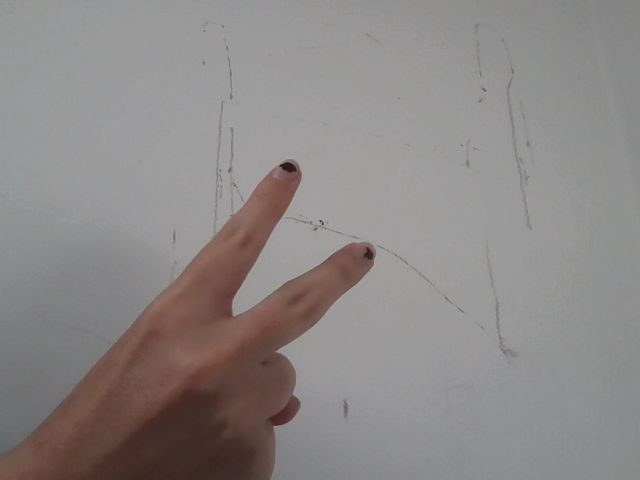

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#Importar imagenes nuevas

In [ ]:
from rembg import remove

In [ ]:
imagen=Image.open("/content/photo.jpg")
imagen=remove(imagen) #remover fondo unicolor
imagen=imagen.resize((30,20)) #redimensionar la imagen a 30x20px
imagen=imagen.convert('L') #convertir a grises
imagen.save("photo_procesada.png")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 177GB/s]


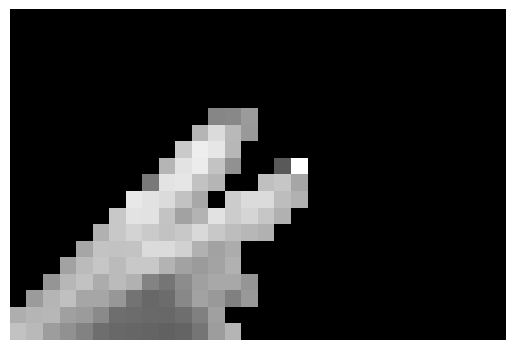

In [ ]:
imagen=Image.open("/content/photo_procesada.png")
plt.imshow(imagen,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
imagen_externa=Image.open("/content/photo_procesada.png").resize((30,20))
imagen_externa_array=np.array(imagen_externa)/255

#asegurarnos que nuestra imagen tiene la forma correcta
imagen_externa_array = np.expand_dims(imagen_externa_array, axis=0)

prediccion_externa=modelo.predict(imagen_externa_array)
clase_predicha_externa=np.argmax(prediccion_externa)
for clase in clases:
  clase_predicha_externa=clases[clase]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [ ]:
print('La clase predicha de la imagen ingresada es: ',descripcion[clase_predicha_externa].capitalize())

La clase predicha de la imagen ingresada es:  Tijera


#Juego

In [ ]:
#Primero selecionamos una imagen aleatoria de las imagenes de prueba
indice_aleatorio=random.randint(0,len(array_de_imagenes_de_prueba)-1)#Restamos -1 porque o si no nos salimos
#de la cantidad de imagenes que tenemos de prueba
imagen_seleccionada=array_de_imagenes_de_prueba[indice_aleatorio] #ubicamos la imagen
clase_real=array_de_clases_de_prueba[indice_aleatorio]#y ubicamos su posicion

#Para utilizar modelos de deep learning en TensorFlow/Keras
#que están diseñados para procesar varias imágenes a la vez
#con un formato de (cantidad de imagenes, altura, ancho, cantidad de
#canales de color), como el modelo fue entrenado con imágenes en
#escala de grises con la forma input_shape=(20,30) sin agregar los
#canales ya que manejamos imagenes en escala de grises, entonces las
#imagenes que intentemos evaluar deben tener el shape de la forma
#(1, 20, 30), es por esto que es necesario usar np.expand_dims para expandir
#en este caso un espacio en la primer posicion para que la imagen pueda
#ser procesada
imagen_seleccionada_expandida=np.expand_dims(imagen_seleccionada, axis=0)
prediccion=modelo.predict(imagen_seleccionada_expandida)
clase_predicha=np.argmax(prediccion)
print(imagen_seleccionada.shape)
print(imagen_seleccionada_expandida.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(20, 30)
(1, 20, 30)


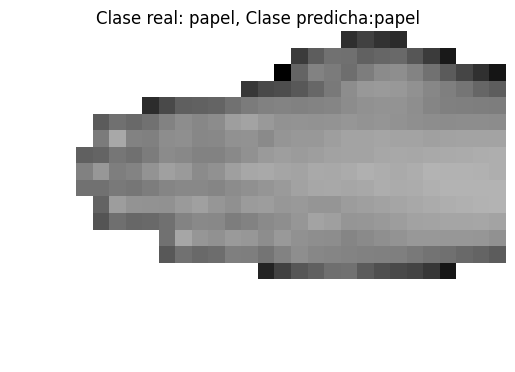

In [ ]:
plt.imshow(imagen_seleccionada,cmap='gray')
plt.title(f'Clase real: {descripcion[clase_real]}, Clase predicha:{descripcion[clase_predicha]}')
plt.axis('off')
plt.show()

##Crear las reglas del juego

In [ ]:
def evaluar_juego(clase1,clase2):
  if clase1==clase2:
    return 'Empate'
  elif (clase1==0 and clase2==1) or (clase1==1 and clase2==2) or (clase1==2 and clase2==0):
    return 'IA Gana'
  else:
    return 'Jugador Gana'

#Juguemos!

Eleccion de la IA: 


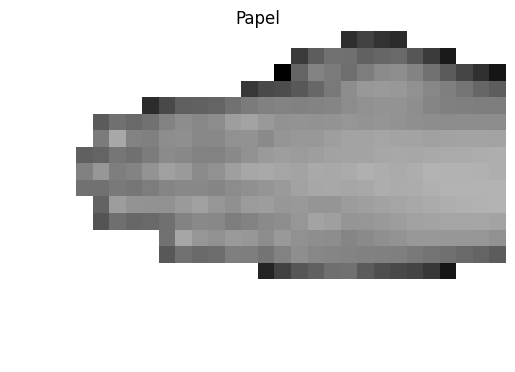

Eleccion del Jugador: Tijera
Resultado del juego: Jugador Gana


In [ ]:
resultado=evaluar_juego(clase_predicha,clase_predicha_externa)
#mostrar los resultados
print(f'Eleccion de la IA: ')
plt.imshow(imagen_seleccionada,cmap='gray')
eleccion=descripcion[clase_predicha].capitalize()
plt.title(f'{eleccion}')
plt.axis('off')
plt.show()
print(f'Eleccion del Jugador: {descripcion[clase_predicha_externa].capitalize()}')
print(f'Resultado del juego: {resultado}')

[Link de acceso Colab](https://colab.research.google.com/drive/1RKSTz2ccPaqa2F90n2DrnVYGEm4yW0CI?usp=sharing)

https://colab.research.google.com/drive/1RKSTz2ccPaqa2F90n2DrnVYGEm4yW0CI?usp=sharing

#No tocar

In [1]:
!git config --global user.name "Js-fonseca"
!git config --global user.email "jufonsecam@unal.edu.co"

In [2]:
!git clone https://github.com/Programacion-UNAL202024-2/Piedra-Papel-IA.git

Cloning into 'Piedra-Papel-IA'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 7.77 KiB | 1.94 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [58]:
!ls /content

 photo.jpg	       Piedra-Papel-IA	     'Proyecto final - Juego piedra papel o tijeras.ipynb'
 photo_procesada.png   Proyecto_final.ipynb   sample_data


In [59]:
!mv /content/Proyecto_final.ipynb /content/Piedra-Papel-IA/

In [60]:
!ls /content/Piedra-Papel-IA

HOLA.ipynb  Proyecto_final.ipynb  README.md


In [61]:
%cd /content/Piedra-Papel-IA
!git add Proyecto_final.ipynb
!git commit -m "Subiendo Proyecto_final.ipynb desde Colab"
!git push origin main

/content/Piedra-Papel-IA
[main 676f6db] Subiendo Proyecto_final.ipynb desde Colab
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Proyecto_final.ipynb (90%)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 47.45 KiB | 5.27 MiB/s, done.
Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resol

In [63]:
!git config --global user.name "Js-fonseca"
!git config --global user.email "jufonsecam@unal.edu.co"

In [64]:
!git add Proyecto_final.ipynb
!git commit -m "Subiendo Proyecto_final.ipynb desde Colab"
!git push origin main

On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 47.45 KiB | 5.27 MiB/s, done.
Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blo

In [55]:
!git push origin main

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 45.32 KiB | 7.55 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:      (?) This repository does not have Secret Scanning enabled, but is eligible. Enable Secret Scanning to view and manage detected secrets.
remote:      Visit the repo